Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# data preprocessing
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# accuracy prediction
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/loan_data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df['Loan_ID'].duplicated().sum()

0

Data Preprocessing

In [6]:
df.drop('Loan_ID', axis=1,inplace = True)

In [7]:
for col in df.columns:
  print('{} Column'.format(col))
  print('----------------------')
  print(df[col].value_counts())

Gender Column
----------------------
Male      489
Female    112
Name: Gender, dtype: int64
Married Column
----------------------
Yes    398
No     213
Name: Married, dtype: int64
Dependents Column
----------------------
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Education Column
----------------------
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
Self_Employed Column
----------------------
No     500
Yes     82
Name: Self_Employed, dtype: int64
ApplicantIncome Column
----------------------
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantIncome, Length: 505, dtype: int64
CoapplicantIncome Column
----------------------
0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64
LoanAmount Column
----------------------

In [8]:
for i in df.columns:
  print(i)

Gender
Married
Dependents
Education
Self_Employed
ApplicantIncome
CoapplicantIncome
LoanAmount
Loan_Amount_Term
Credit_History
Property_Area
Loan_Status


In [9]:
df['Loan_Amount_Term'].isnull().sum()

14

In [10]:
# Filling the na values with mode method
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

df['Married'].fillna(df['Married'].mode()[0], inplace=True)

df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Dependents'] = df['Dependents'].replace(to_replace='3+', value=4)

df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

## Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


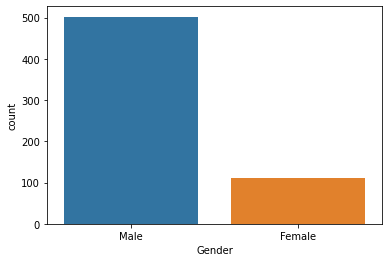

In [11]:
# Gender
sns.countplot(df['Gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


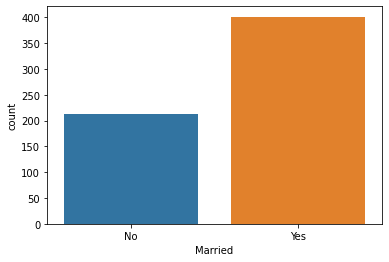

In [12]:
# Married
sns.countplot(df['Married'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


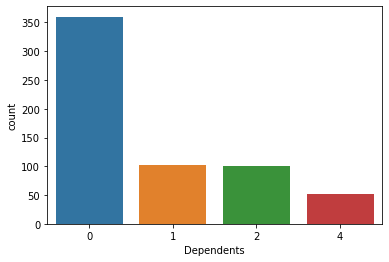

In [13]:
# Dependents
sns.countplot(df['Dependents'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


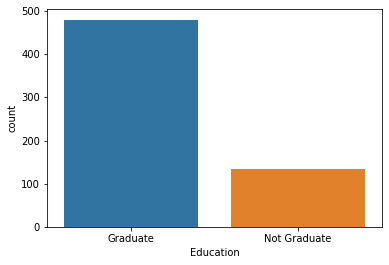

In [14]:
# Education
sns.countplot(df['Education'])

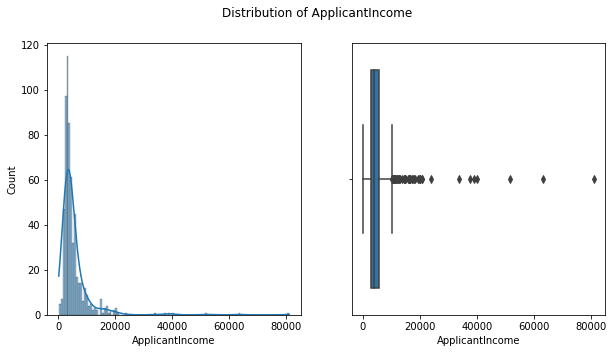

In [15]:
# ApplicantIncome
fig,ax = plt.subplots(1,2, figsize=(10,5));
sns.histplot(df["ApplicantIncome"], kde = True, ax = ax[0]);
sns.boxplot(x = 'ApplicantIncome' , data = df, ax=ax[1]);
plt.suptitle("Distribution of ApplicantIncome");

Text(0.5, 1.0, 'Distribution of CoapplicantIncome')

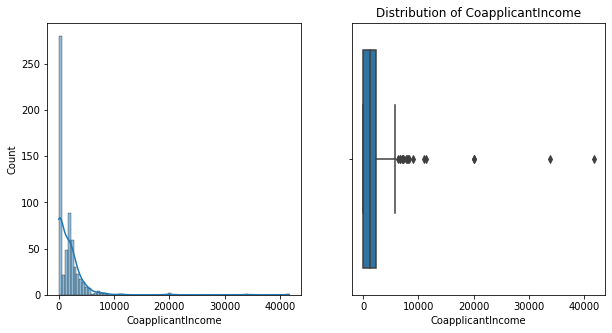

In [16]:
# CoapplicantIncome
fig, ax = plt.subplots(1,2, figsize = (10,5))
sns.histplot(df['CoapplicantIncome'], kde = True, ax = ax[0])
sns.boxplot(x = df['CoapplicantIncome'], data = df, ax = ax[1])

plt.title('Distribution of CoapplicantIncome')

Text(0.5, 1.0, 'Distribution of LoanAmount')

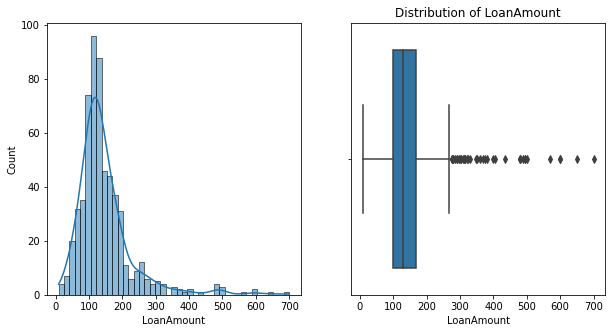

In [17]:
# LoanAmount
fig, ax = plt.subplots(1,2, figsize=(10,5))
sns.histplot(df['LoanAmount'], kde = True, ax = ax[0])
sns.boxplot(x = df['LoanAmount'], data = df, ax = ax[1])

plt.title('Distribution of LoanAmount')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


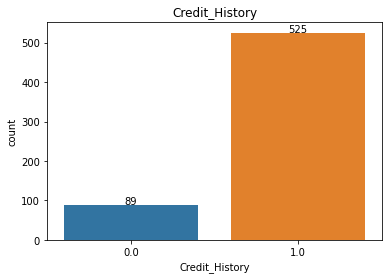

In [18]:
# Credit_History
ax = sns.countplot(df["Credit_History"]);

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
    
ax.set_title("Credit_History");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


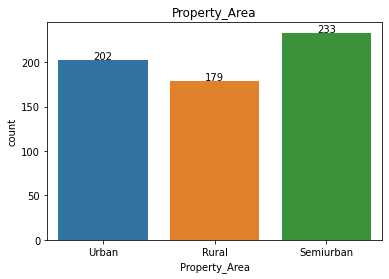

In [19]:
# Property_Area
ax = sns.countplot(df["Property_Area"]);

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
    
ax.set_title("Property_Area");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


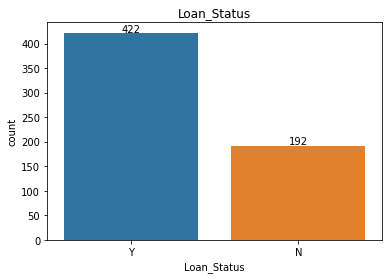

In [20]:
# Loan_Status
ax = sns.countplot(df["Loan_Status"]);

for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 4), textcoords = 'offset points')
    
ax.set_title("Loan_Status");

## Plot Heatmap

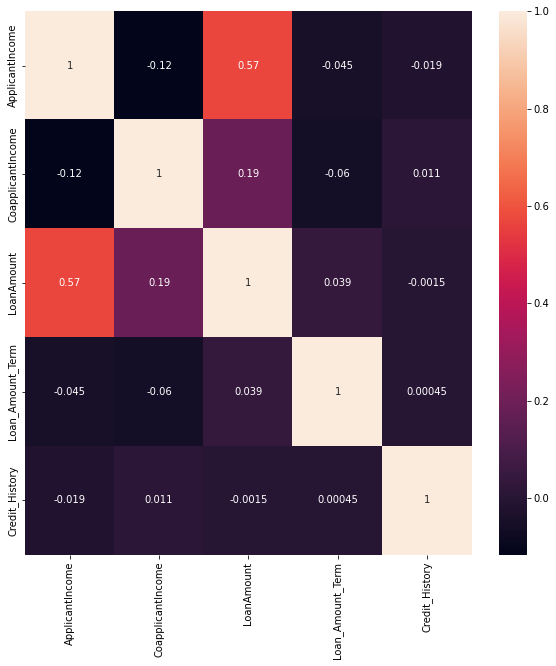

In [48]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot = True)

Separating the Dependent and Independent Variables

In [21]:
X = df.drop('Loan_Status', axis = 1)
Y = df['Loan_Status']

In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=0)

Column Transformation

SimpleImputer => Loan_Amount,  Loan_Amount_Term

ordinal encoder => Eucation,Property_Area

OneHotEncoder => Gender, Married,Self_Employed, 

LabelEncoer => Loan_Status

In [23]:
transformer = ColumnTransformer(transformers=[
    ('trans1', SimpleImputer(),['LoanAmount','Loan_Amount_Term']),
    ('trans2', OrdinalEncoder(categories=[['Graduate','Not Graduate'],['Urban','Semiurban','Rural']]),['Education','Property_Area']),
    ('trans3', OneHotEncoder(sparse=False, drop='first'),['Gender','Married','Self_Employed'])
], remainder='passthrough')

In [24]:
X_train_new = transformer.fit_transform(X_train)
X_test_new  = transformer.transform(X_test)

In [25]:
print(pd.DataFrame(X_train_new))

        0      1    2    3    4    5    6  7      8        9    10
0    131.0  360.0  0.0  1.0  1.0  1.0  0.0  0   2958   2900.0  1.0
1    196.0  360.0  0.0  1.0  1.0  0.0  0.0  1  11250      0.0  1.0
2    149.0  360.0  0.0  2.0  1.0  1.0  0.0  0   3948   1733.0  0.0
3    116.0  180.0  0.0  0.0  0.0  0.0  0.0  0   3813      0.0  1.0
4    150.0  360.0  0.0  1.0  1.0  1.0  0.0  2   4708   1387.0  1.0
..     ...    ...  ...  ...  ...  ...  ... ..    ...      ...  ...
486   80.0  360.0  0.0  0.0  1.0  1.0  0.0  0   3103   1300.0  1.0
487  349.0  360.0  0.0  1.0  1.0  1.0  0.0  1  12841  10968.0  1.0
488  200.0  360.0  0.0  1.0  1.0  1.0  0.0  4   5167   3167.0  1.0
489  160.0  360.0  1.0  0.0  1.0  1.0  0.0  0   6033      0.0  1.0
490  182.0  360.0  0.0  1.0  0.0  1.0  0.0  0   4180   2306.0  1.0

[491 rows x 11 columns]


Label Encoding the Output

In [26]:
encoder = LabelEncoder()
Y_train_new = encoder.fit_transform(Y_train)
Y_test_new = encoder.transform(Y_test)

## Modeling

## Logistic Regression

In [27]:
lr_model = LogisticRegression()

In [28]:
lr_model.fit(X_train_new, Y_train_new)

LogisticRegression()

Accuracy Prediction

In [29]:
# Accuracy On Training Dataset
X_train_prediction = lr_model.predict(X_train_new)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train_new)
print('The accuracy on Training dataset is : {}'.format(training_data_accuracy*100))

The accuracy on Training dataset is : 80.44806517311609


In [30]:
# Accuracy On Testing Dataset
X_test_prediction = lr_model.predict(X_test_new)
lr_accuracy = accuracy_score(X_test_prediction, Y_test_new)
print('The accuracy on Training dataset is : {}'.format(lr_accuracy*100))

The accuracy on Training dataset is : 82.92682926829268


## KNeighborsClassifier

In [31]:
knc_model = KNeighborsClassifier(n_neighbors=13)

knc_model.fit(X_train_new, Y_train_new)

KNeighborsClassifier(n_neighbors=13)

Accuracy Prediction

In [32]:
# Accuracy On Training Dataset
X_train_prediction = knc_model.predict(X_train_new)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train_new)
print('The accuracy on Training dataset is : {}'.format(training_data_accuracy*100))

The accuracy on Training dataset is : 69.24643584521385


In [33]:
# Accuracy On Testing Dataset
X_test_prediction = knc_model.predict(X_test_new)
knc_accuracy = accuracy_score(X_test_prediction, Y_test_new)
print('The accuracy on Training dataset is : {}'.format(knc_accuracy*100))

The accuracy on Training dataset is : 69.10569105691057


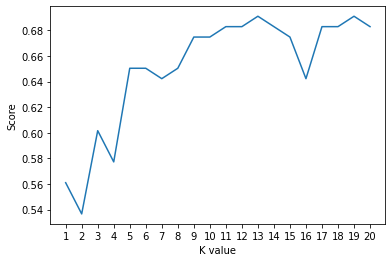

[0.5609756097560976, 0.5365853658536586, 0.6016260162601627, 0.5772357723577236, 0.6504065040650406, 0.6504065040650406, 0.6422764227642277, 0.6504065040650406, 0.6747967479674797, 0.6747967479674797, 0.6829268292682927, 0.6829268292682927, 0.6910569105691057, 0.6829268292682927, 0.6747967479674797, 0.6422764227642277, 0.6829268292682927, 0.6829268292682927, 0.6910569105691057, 0.6829268292682927]
KNN best accuracy: 69.11%


In [34]:
# Another Way
knn = []
for i in range(1,21):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train_new, Y_train_new)
    knn.append(KNclassifier.score(X_test_new, Y_test_new))
    
plt.plot(range(1,21), knn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
print(knn)
KNAcc = max(knn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

Support Vector Machine

In [35]:
svm_model = SVC(kernel='linear', random_state=0)

svm_model.fit(X_train_new, Y_train_new)

SVC(kernel='linear', random_state=0)

In [36]:
#Predicting the test set result 
X_test_prediction = svm_model.predict(X_test_new)
svm_accuracy = accuracy_score(X_test_prediction, Y_test_new)
print('Accuracy on Testing data is : {}'.format(svm_accuracy*100))

Accuracy on Testing data is : 79.67479674796748


## GaussianNB

In [37]:
gnb_model = GaussianNB()

gnb_model.fit(X_train_new, Y_train_new)

GaussianNB()

In [38]:
#Predicting the test set result 
X_test_prediction = gnb_model.predict(X_test_new)
gnb_accuracy = accuracy_score(X_test_prediction, Y_test_new)
print('Accuracy on Testing data is : {}'.format(gnb_accuracy*100))

Accuracy on Testing data is : 82.92682926829268


## CategoricalNB

In [39]:
cnb_model = CategoricalNB()

cnb_model.fit(X_train_new, Y_train_new)

CategoricalNB()

In [40]:
#Predicting the test set result 
X_test_prediction = cnb_model.predict(X_test_new)
cnb_accuracy = accuracy_score(X_test_prediction, Y_test_new)
print('Accuracy on Testing data is : {}'.format(cnb_accuracy*100))

Accuracy on Testing data is : 81.30081300813008


## DecisionTreeClassifier

In [41]:
dtc_model = DecisionTreeClassifier(criterion='entropy', random_state=0)

dtc_model.fit(X_train_new, Y_train_new)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [42]:
#Predicting the test set result 
X_test_prediction = dtc_model.predict(X_test_new)
dtc_accuracy = accuracy_score(X_test_prediction, Y_test_new)
print('Accuracy on Testing data is : {}'.format(dtc_accuracy*100))

Accuracy on Testing data is : 76.42276422764228


## RandomForestClassifier

In [43]:
rfc_model = RandomForestClassifier(n_estimators= 10, criterion="entropy")

rfc_model.fit(X_train_new, Y_train_new)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [44]:
#Predicting the test set result 
X_test_prediction = rfc_model.predict(X_test_new)
rfc_accuracy = accuracy_score(X_test_prediction, Y_test_new)
print('Accuracy on Testing data is : {}'.format(rfc_accuracy*100))

Accuracy on Testing data is : 78.86178861788618


## GradientBoostingClassifier

In [45]:
gbc_model = GradientBoostingClassifier()

gbc_model.fit(X_train_new, Y_train_new)

GradientBoostingClassifier()

In [46]:
#Predicting the test set result 
X_test_prediction = rfc_model.predict(X_test_new)
gbc_accuracy = accuracy_score(X_test_prediction, Y_test_new)
print('Accuracy on Testing data is : {}'.format(gbc_accuracy*100))

Accuracy on Testing data is : 78.86178861788618


In [47]:
compare = pd.DataFrame({'Model': ['LogisticRegression',
                                  'KNeighborsClassifier',
                                  'SVM',
                                  'GaussianNB', 
                                  'Categorical NB', 
                                  'DecisionTreeClassifier',
                                  'RandomForestClassifier',
                                  'GradientBoostingClassifier'
                                  ], 
                        'Accuracy': [lr_accuracy*100,
                                     knc_accuracy*100 ,
                                     svm_accuracy*100,
                                     gnb_accuracy*100,
                                     cnb_accuracy*100,
                                     dtc_accuracy*100,
                                     rfc_accuracy*100,
                                     gbc_accuracy*100
                                     ]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,LogisticRegression,82.926829
3,GaussianNB,82.926829
4,Categorical NB,81.300813
2,SVM,79.674797
6,RandomForestClassifier,78.861789
7,GradientBoostingClassifier,78.861789
5,DecisionTreeClassifier,76.422764
1,KNeighborsClassifier,69.105691
